## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import hashlib

import spacy
from spacy import displacy
# !python -m spacy download en_core_web_sm

import pprint
import random
import nltk
# nltk.download('punkt')
import sklearn
# !pip install matplotlib
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


2023-07-16 15:50:01.769409: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-16 15:50:01.835422: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-16 15:50:02.245786: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-16 15:50:02.247460: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-16 15:50:03.630315: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

## Importing Dataset

In [2]:
# import os

# os.listdir(os.getcwd())
dataset_processed = pd.read_json("../data/jira_dump_processed_v4.json")
#dataset= dataset.iloc[:100]


In [3]:
df1 = dataset_processed.copy()

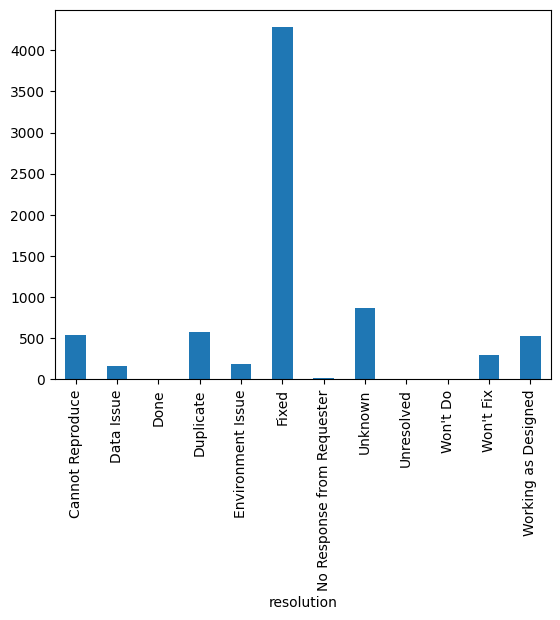

In [4]:
df1.groupby('resolution').text.count().plot.bar(ylim=0)
plt.show()

In [5]:
df1.resolution.value_counts().index.values,len(df1.resolution.value_counts().index.values)

(array(['Fixed', 'Unknown', 'Duplicate', 'Cannot Reproduce',
        'Working as Designed', "Won't Fix", 'Environment Issue',
        'Data Issue', 'No Response from Requester', "Won't Do", 'Done',
        'Unresolved'], dtype=object),
 12)

<Axes: ylabel='count'>

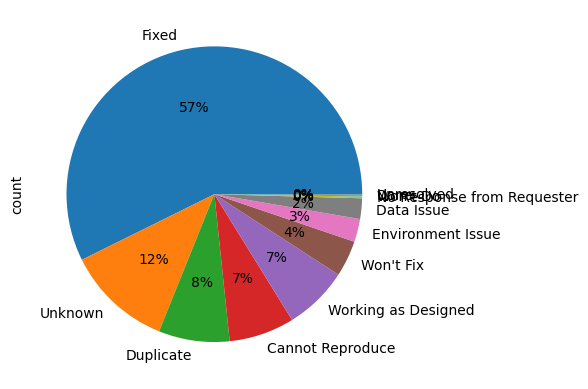

In [6]:
df1.resolution.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [7]:
merger = ["Unresolved","Won't Do","Won't Fix","No Response from Requester","Cannot Reproduce"]
merger1 = ["Done","Fixed"]
merger2 = ["Unknown","Awaiting Response","No Response from Requester"]
df1['resolution'] = df1['resolution'].replace(merger, 'Other')
df1['resolution'] = df1['resolution'].replace(merger1, 'Fixed')
df1['resolution'] = df1['resolution'].replace(merger2, 'Unknown')

In [8]:
df1.resolution.value_counts()

resolution
Fixed                  4287
Unknown                 865
Other                   855
Duplicate               579
Working as Designed     525
Environment Issue       188
Data Issue              168
Name: count, dtype: int64

<Axes: ylabel='count'>

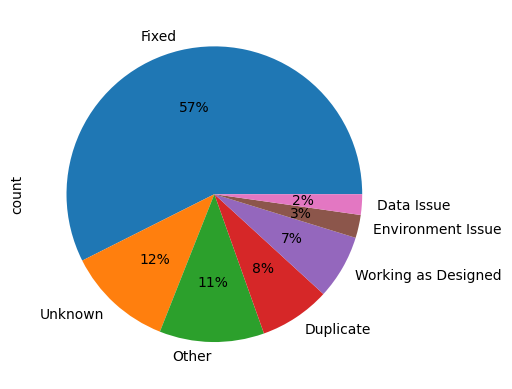

In [9]:
df1.resolution.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [10]:
Name_Series = ['Data Issue']
df1['Label'] = df1.resolution.isin(Name_Series) * 1
df1

,id,component,resolutiondate,description,summary,priority,status,customers,origination_type,resolution,labels,created,comments,numComments,authors,author_tzs,comments_created,text,textprocessed,Label
0,DTRIAGE-14391,,None,reproduced on from our documentation p13 we ca...,00500543 supplier management authorization i...,Major,To Analyse,Rabot Dutilleul,Customer Issue,Unknown,,2023-06-20T11:57:16.561-0400,,0.0,,,,reproduced on from our documentation p13 we ca...,reproduced on from our documentation p13 we ca...,0
1,DTRIAGE-14390,,None,hello we have an issue with the send of the p...,sc 00495859: purchase order not automatically...,Major,To Analyse,Ingerop,Customer Issue,Unknown,,2023-06-20T10:08:20.119-0400,,0.0,,,,hello we have an issue with the send of the p...,hello we have an issue with the send of po pdf...,0
2,DTRIAGE-14389,CLM,None,issue reported by pcori in their environment. ...,effective contract s total amended value field...,Minor,To Analyse,PCORI,Customer Issue,Unknown,,2023-06-20T08:28:25.778-0400,,0.0,,,,issue reported by pcori in their environment. ...,issue reported by pcori in their environment. ...,0
3,DTRIAGE-14388,P2P,None,connect to prod and go to interface s entry101...,sf 00501920 : agirc arcco s entry101 acc...,Major,To Analyse,AGIRC-ARRCO,Customer Issue,Unknown,,2023-06-20T07:50:13.961-0400,,0.0,,,,connect to prod and go to interface s entry101...,connect to prod and go interface s entry101 ac...,0
4,DTRIAGE-14387,SIM,None,sbachelier gtt2023 create an action plan ...,action plans : 2 contact users available when ...,Major,To Analyse,Gaztransport & Technigaz,Customer Issue,Unknown,,2023-06-20T06:07:10.932-0400,,0.0,,,,sbachelier gtt2023 create an action plan ...,sbachelier gtt2023 create an action plan and s...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7462,CP-13184,"CLM,CLM. WOPI",2022-03-07T04:29:49.481-0500,word document is not opened in edit mode in th...,word document is not opened in edit mode in th...,Critical,Closed,Unknown,Internal Issue,Working as Designed,Documentation,2022-03-02T09:55:06.435-0500,word document will be opened in edit mode ...,11.0,"60e5fb6d0dd4f60076a7a803,557058:458a0bee-a633-...","America/New_York,America/New_York,Europe/Paris...",2022-03-04T10:57:25.692-05002022-03-04T11:46:2...,word document is not opened in edit mode in th...,word document is not opened in edit mode the a...,0
7463,CP-13183,UI,2022-03-10T07:04:47.897-0500,modelization devtools module is activated in...,500 error after clicking on go button on the...,Major,Closed,Unknown,Internal Issue,Other,"Sanity_automation,Selenium_automation,daily_sa...",2022-02-28T10:52:42.867-0500,please look at logs and provide more ...,4.0,"557058:78ce0124-0b6f-4de1-ba0f-90e1cc581ebf,5d...","Europe/Paris,America/New_York,Europe/Kiev,Amer...",2022-02-28T11:16:08.363-05002022-03-01T03:34:0...,modelization devtools module is activated in...,modelization devtools module is activated in v...,0
7464,CP-13182,"P2P,P2P. PR/ Requisition Mgmt",2022-03-08T10:18:31.708-0500,panel:bgcolor deebff setups procurement ...,not all of priorities are available,Minor,Closed,Unknown,Internal Issue,Fixed,,2022-02-28T09:45:25.500-0500,i don t have this issue could you ch...,6.0,"5fd9094534847e00692abcab,5fd9094534847e00692ab...","America/New_York,America/New_York,America/New_...",2022-03-01T06:10:18.826-05002022-03-03T05:25:3...,panel:bgcolor deebff setups procurement ...,panel:bgcolor deebff setups procurement requis...,0
7465,CP-13181,"P2P,P2P. Invoicing/ Credit notes Mgmt",2022-03-09T10:17:43.236-0500,open invoice in any status and press create cr...,warning message does not appear if net total t...,Minor,Closed,Unknown,Internal Issue,Fixed,,2022-02-28T07:17:40.707-0500,this ticket give current problem ...,11.0,"5fc66abd3b4f590068e9bca4,557058:9d0209c2-5757-...","America/New_York,America/New_York,Europe/Kiev,...",2022-03-01T10:13:25.151-05002022-03-03T03:38:2...,open invoice in any status and press create cr.

In [16]:
df2 = df1.groupby('Label', group_keys=False).apply(lambda x: x.sample(168))
df2

,id,component,resolutiondate,description,summary,priority,status,customers,origination_type,resolution,labels,created,comments,numComments,authors,author_tzs,comments_created,text,textprocessed,Label
3826,CP-80001,SIM,2022-11-01T05:12:55.843-0400,when you go to a supplier file on the rating...,supplier notation 403 error on supplier nota...,Major,Closed,Groupe Hervé,Customer Issue,Fixed,"CHANGELOG_JIRA_22.27_1PREVIEW,CHANGELOG_JIRA_2...",2022-10-27T05:35:01.804-0400,checked on the test environment dsim10 ...,12.0,"61b791570f02490069d7fb82,61b791570f02490069d7f...","Europe/Kiev,Europe/Kiev,America/New_York,Ameri...",2022-10-28T10:45:31.564-04002022-10-31T12:08:1...,when you go to a supplier file on the rating...,when you go to a supplier file on the ratings ...,0
3531,CP-81437,"CPL,FRWK,FRWK. Approval Workflow",2022-11-29T09:51:28.493-0500,checkboxes are not disabled if inverted rule a...,backport cp 79218 php8 checkboxes are not ...,Major,Closed,Unknown,Internal Issue,Fixed,"MANUAL_MERGE,PHP8",2022-11-29T08:55:28.218-0500,checked on php8 22 fixbranch. issue is n...,7.0,"557058:f25c38b3-f84d-42f9-89cb-58af21b5555d,55...","America/New_York,America/New_York,America/New_...",2022-11-30T04:40:07.341-05002022-12-08T06:32:1...,checkboxes are not disabled if inverted rule a...,checkboxes are not disabled if inverted rule a...,0
6008,CP-70806,"FRWK,FRWK. Export",2022-06-02T04:16:48.598-0400,production issue. reproduced in r21 and r22. a...,sf 347887 contract template exports with at...,Critical,Closed,"ASCO,CHOA",Customer Issue,Fixed,"CHANGELOG_JIRA_22.5,CHANGELOG_JIRA_22.5_PREVIE...",2022-05-25T21:13:55.569-0400,this ticket is a blocker and need to ...,24.0,"557058:78ce0124-0b6f-4de1-ba0f-90e1cc581ebf,5d...","Europe/Paris,America/New_York,Europe/Kiev,Amer...",2022-05-26T07:35:10.178-04002022-05-26T11:01:3...,production issue. reproduced in r21 and r22. a...,production issue. reproduced in r21 and r22. a...,0
3702,CP-80730,"FRWK,P2P",2023-03-23T03:09:24.687-0400,there is an alert setting for requisitions pen...,alerts for requisition approval reminders are ...,Major,Closed,Webber Construction,Customer Issue,Other,"ENCORA,GREENLISTCUSTOMER,ICU_Primary,IT/CoreDe...",2022-09-26T14:54:45.155-0400,alerts triggered as expected when i...,6.0,"6328870bfedc6169aed3a597,5c7d6c1472cb04154791c...","Asia/Kolkata,America/New_York,Asia/Kolkata,Ame...",2022-10-19T10:48:07.456-04002022-10-31T10:22:4...,there is an alert setting for requisitions pen...,there is an alert setting for requisitions pen...,0
5549,CP-73866,P2P,2022-10-10T03:32:15.315-0400,hello team please look from where this query g...,slow query on sandbox,Critical,Closed,HBR Sherman & Howard,Internal Issue,Environment Issue,slow_jul,2022-07-12T08:38:37.695-0400,:e2142578 e62b 4cd9 a1e2 3d80998e9f12 :...,13.0,"557058:8e1c69bc-61b2-45fe-8a43-af86835971a3,55...","America/New_York,America/New_York,America/New_...",2022-07-14T11:36:45.096-04002022-07-14T11:44:5...,hello team please look from where this query g...,hello team please look from where this query g...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5233,CP-75312,"FRWK,FRWK. Scheduled Tasks",2022-09-02T03:40:54.691-0400,send emails scheduled tasks is stuck in runnin...,send emails scheduled tasks is stuck in running,Critical,Closed,Amazon Web Services,Customer Issue,Data Issue,"BIG_CHURN,DELAYED_2022-08-28,ENCORA,GREENLISTC...",2022-07-26T11:21:08.485-0400,:6f71ce78 e835 46bb 8a12 335177f59f7c c...,42.0,"557058:468ad705-fed0-406e-b72c-cfb9a382edf1,55...","America/Indianapolis,America/Indianapolis,Euro...",2022-07-26T11:25:35.974-04002022-07-26T13:12:0...,send emails scheduled tasks is stuck in runnin...,send emails scheduled tasks is stuck in runnin...,1
4835,CP-77007,CLM,2022-10-26T08:42:09.116-0400,sometimes up to 50 of launches when sending...,after sending the sending of the letter the n...,Major,Closed,Unknown,Internal Issue,Data Issue,Selenium_automation,2022-09-08T06:30:19.707-0400,i ve tr

### Creating Word Tokens

In [11]:
from nltk.tokenize import word_tokenize
def tokenize_text(text):
  tokentext=word_tokenize(text)
  return tokentext

df1['textprocessed']=df1['textprocessed'].apply(tokenize_text)


### Stemming

In [12]:
from nltk.stem import PorterStemmer
# words=["light","lighting","lights"]
ps=PorterStemmer()
def stemText(text):

    rootwordlist =" ".join(ps.stem(w) for w in text)
    return rootwordlist
df1['textprocessed']=df1['textprocessed'].apply(stemText)

### Lemmatization

In [13]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
  words = text.split()
  words = [lemmatizer.lemmatize(word,pos='v') for word in words]
  return ' '.join(words)
df1['textprocessed']=df1['textprocessed'].apply(lemmatize_words)

[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


### Removing StopWords

In [14]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
new_stopwords = ["width", "height", "hi", "accountid", "please","pdf","version",'dnztzmtndqcvjtbgdeewdzzzbtrmn','rrd','vljmrjdqnfv','bxirnzltynj','etngbdlezvgxaljzzkxmowdcqzhmm','ap','jsnq',
    'owoxfwvghtuupdwejqtmfoewevsxq','mgnbwkhmwhlarjr','dxlqukrhyy','nymmtrr','xiyzfjsdndz','dxqwtqv','myzvzesfnieuhhbkl',
    'ewezalewn','autocopypo','autocopypo','www','kgkyyvhg','ctxt','cpshash','eb','ed','ggowck','null','cff','eed','fda',
    'cp','gtt','dbd','bpsrc','domusvi','ce','aaaaaa','x','u','dc','ac','cc','f','cfb','cfb','af','ffaaaa','efa','ff','tr',
    'ae','uc','mp','mt','le','jpg','yd','fb','fcef','fcs','fe','aedc','deebff','pur','ddep','fr','png','',"fyi","22","ticket","issue","error", "color","panel","php","closed","fixed"
]
stp_words = nltk.corpus.stopwords.words('english')
stp_words.extend(new_stopwords)
# stp_words=stopwords.words('english')
def clean_text(review):
  cleantext=" ".join(word for word in review.
                       split() if word not in stp_words)
  return cleantext
 
df1['textprocessed']=df1['textprocessed'].apply(clean_text)

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [17]:
df2['textprocessed']

3826    when you go to a supplier file on the ratings ...
3531    checkboxes are not disabled if inverted rule a...
6008    production issue. reproduced in r21 and r22. a...
3702    there is an alert setting for requisitions pen...
5549    hello team please look from where this query g...
                              ...                        
5233    send emails scheduled tasks is stuck in runnin...
4835    sometimes up to 50 of launches when sending an...
106     number of unsent emails remains the same throu...
599     calendar is not showing the correct day to mon...
6731    customer doesn t use english language connect ...
Name: textprocessed, Length: 336, dtype: object

In [19]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
new_stopwords = ["width", "height", "hi", "accountid", "please","pdf","version",'dnztzmtndqcvjtbgdeewdzzzbtrmn','rrd','vljmrjdqnfv','bxirnzltynj','etngbdlezvgxaljzzkxmowdcqzhmm','ap','jsnq',
    'owoxfwvghtuupdwejqtmfoewevsxq','mgnbwkhmwhlarjr','dxlqukrhyy','nymmtrr','xiyzfjsdndz','dxqwtqv','myzvzesfnieuhhbkl',
    'ewezalewn','autocopypo','autocopypo','www','kgkyyvhg','ctxt','cpshash','eb','ed','ggowck','null','cff','eed','fda',
    'cp','gtt','dbd','bpsrc','domusvi','ce','aaaaaa','x','u','dc','ac','cc','f','cfb','cfb','af','ffaaaa','efa','ff','tr',
    'ae','uc','mp','mt','le','jpg','yd','fb','fcef','fcs','fe','aedc','deebff','pur','ddep','fr','png','',"fyi","22","ticket","issue","error", "color","panel","php","closed","fixed"
]
corpus = []

for i in df2.index:
    review = re.sub('[^a-zA-Z]',' ',df2['textprocessed'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    stp_words = nltk.corpus.stopwords.words('english')
    stp_words.extend(new_stopwords)
    review = [ps.stem(word) for word in review if not word in set(stp_words)]
    review = [lemmatizer.lemmatize(word,pos='v') for word in review]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kpandit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/kpandit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Implementing Logistic Regression

In [29]:
print(corpus)

['go supplier file rate tab click view rate get problem still present modifi display posit button top page check anoth client notat herv thermiqu check test environ dsim user author userwauth v pick sever supplier proceed scorecard profil suplwscorecard exist newlycrsup newli creat btn display reproduc custom move dtriag bug sql relat noformat groupeherv critic sqlstate column find unknown partnertyp field list select supplierid supplierid supperform suptrend nbassess scorecardtrend supnam turnovernborderinprogress turnov turnoverlast month nborderinprogress nborder nborderlast month curid date format esindexd h esindexd rid limit use prepar statement look like posit bug find pr github branch fixbranch correspond git research launch http github com determin corp dcp test search q atitl base org adetermin apr amerg sort acreat asc type issu tri match regex solut commit b ba caf afe cb e result fals auto merg imposs option use former manual process set version backport need fix forget em

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = df2['Label'].values

In [24]:
len(X[0])

1500

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
ytest = np.array(y_test)

# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, y_pred))
print(confusion_matrix(ytest, y_pred))

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.85      0.78      0.82        37
           1       0.76      0.84      0.80        31

    accuracy                           0.81        68
   macro avg       0.81      0.81      0.81        68
weighted avg       0.81      0.81      0.81        68

[[29  8]
 [ 5 26]]
Accuracy: 0.8088235294117647


In [32]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]]


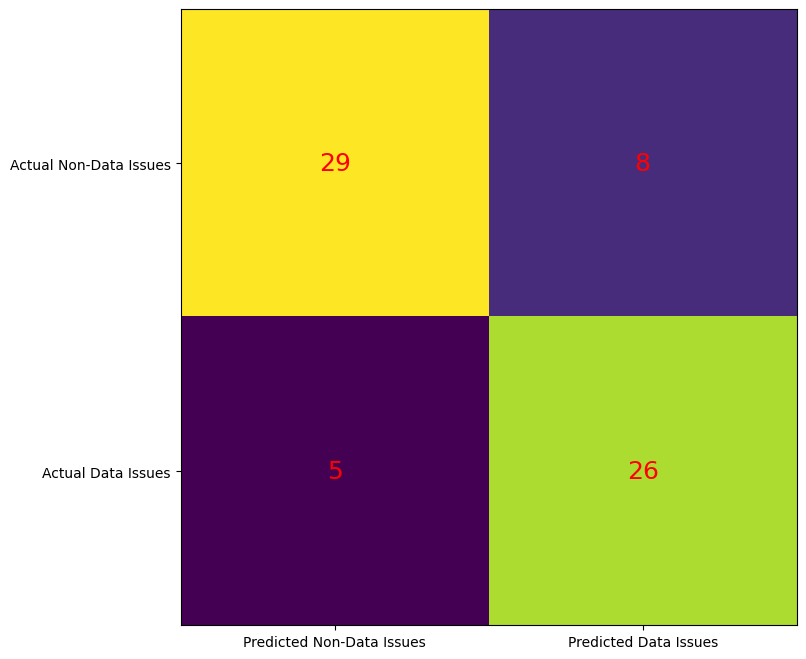

In [27]:
cm = confusion_matrix(ytest, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Non-Data Issues', 'Predicted Data Issues'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Non-Data Issues', 'Actual Data Issues'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red',size = 18)
plt.show()

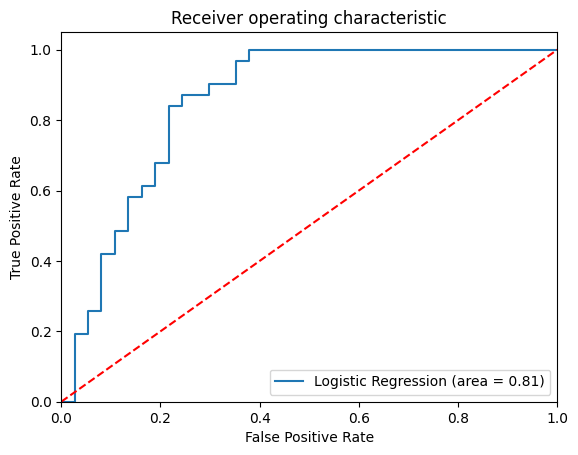

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()